## Forward Propagation y análisis de representaciones intermedias
Rubén Gonzalez 20003314

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def PlotImagen(nombre, grises = True):
    img = cv2.imread(nombre)
    if grises == True:
        #img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show

### Parte 0: Ejercicio en clase
Implementando red neuronal de la siguiente imagen:
<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [3]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [4]:
#Prueba funcion sigmoide
sigmoid(np.array([2,3,4]))

array([0.88079708, 0.95257413, 0.98201379])

In [5]:
#Parametros entrenables
Wc1 = np.array([
  [0.9,0.8,0.1],
  [0.3,0.5,0.6],
  [0.2,0.4,0.7]    
])

In [6]:
Wc2 = np.array([0.3,0.5,0.9])

In [7]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

#### Forward Propagation (inferencia, prediccion o estimacion)

In [8]:
H = np.matmul(X,Wc1)

In [9]:
A = sigmoid(H)

In [10]:
A

array([[0.75026011, 0.76852478, 0.68997448],
       [0.89090318, 0.95257413, 0.96770454],
       [0.99816706, 0.99969655, 0.9994998 ],
       [0.99988835, 0.99998987, 0.99996957]])

In [11]:
y_aprox = sigmoid(np.matmul(
    A,Wc2
))

In [12]:
y_aprox

array([0.77387413, 0.83403412, 0.84538425, 0.84552612])

##### Cambiando la estructura como una composicion de funciones

In [13]:
def g(X):
    return sigmoid(np.matmul(X,Wc1))

In [14]:
def f(g):
    return sigmoid(np.matmul(g,Wc2))

In [15]:
y_aprox_compFunciones = f(g(X))

In [16]:
y_aprox_compFunciones

array([0.77387413, 0.83403412, 0.84538425, 0.84552612])

##### Orientado a objetos

In [17]:
class RedNeuronalEjemplo:
    def __init__(self):
        self.Wc1 = np.array([
            [0.9,0.8,0.1],
            [0.3,0.5,0.6],
            [0.2,0.4,0.7]    
        ])

        self. Wc2  = np.array([0.3,0.5,0.9])

    def forward_propagation(self,X):
        A = sigmoid(np.matmul(X,self.Wc1))
        y_aprox = sigmoid(np.matmul(A,self.Wc2))

        return y_aprox

In [18]:
red = RedNeuronalEjemplo()
red.forward_propagation(X)

array([0.77387413, 0.83403412, 0.84538425, 0.84552612])

### Parte 1: Calculando la salida de un MLP
* Utilizando Numpy definir una función para calcular la salida de los siguientes modelos 
* Dado que cada sub-modelo “detecta” una característica intermedia h(variable latente) determinar  para cada entrada la característica intermedia con mayor presencia.

#### Diagrama 1:

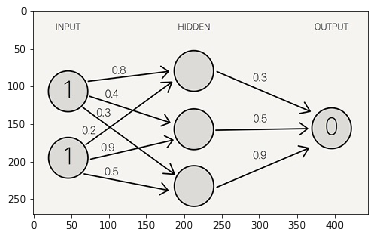

In [19]:
PlotImagen("Diagrama2.jpg")

In [20]:
class RedNeuronal:
    def __init__(self, Wc1, Wc2):
        # 1 fila por neurona , 1 columna por variable de entrada
        self.Wc1 = Wc1

        # 1 elemento para cada neurona intermedia
        self.Wc2  = Wc2

    def forward_propagation(self,X, bias = False):
        print("Shape de X: "+str(X.shape))
        print("Shape de pesos capa 1 transpuesto: "+ str(self.Wc1.T.shape))
        A = sigmoid(np.matmul(X,self.Wc1.T)) # 1 fila por observacion, 1 columna por representacion intermedia
        #Se crea una columna de 1's para usarla como entrada del peso del sesgo
        if bias:
            A = np.insert(A, 2, np.ones(len(A)), axis=1).astype(np.float32)
        print("Shape de A: " + str(A.shape))
        print(A)
        y_aprox = sigmoid(np.matmul(A,self.Wc2)) # 1 fila por observacion,  1 unica salida
        print("Shape de y hat: " + str(y_aprox.shape))
        return y_aprox, A

In [21]:
# 1 observacion, 2 variables
X1 = np.array([
      [1,1]
])

In [22]:
PesosCapa1_Diag1 = np.array([
    [0.8,0.2],
    [0.4,0.9],
    [0.3,0.5]])

In [23]:
PesosCapa2_Diag1 = np.array([0.3,0.5,0.9])

In [24]:
red1 = RedNeuronal(PesosCapa1_Diag1, PesosCapa2_Diag1)
y_aprox1, _ = red1.forward_propagation(X1)

Shape de X: (1, 2)
Shape de pesos capa 1 transpuesto: (2, 3)
Shape de A: (1, 3)
[[0.73105858 0.78583498 0.68997448]]
Shape de y hat: (1,)


In [25]:
y_aprox1

array([0.77438027])

Dados los valores obtenidos en la capa oculta de los valores, la caracteristica con con mayor presencia es la de en medio. Tiene valores mas altos. Es la que mas se parece a los datos de entrada. En el caso de la entrada x1 =1 y x2 = 1 su valor es de 0.78

##### Diagrama 2:

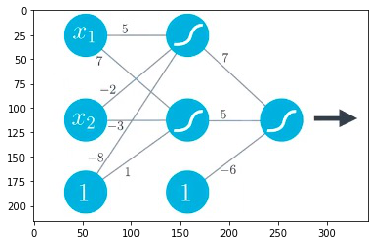

In [26]:
PlotImagen("Diagrama1.jpg")

In [27]:
# 1 observacion, 2 variables y se incluye el sesgo con un uno al final.
X2 = np.array([
      [1,1,1]
])

In [28]:
PesosCapa1_Diag2 = np.array([
    [5,-2,-8],
    [7,-3,1]])

In [29]:
PesosCapa2_Diag2 = np.array([7,5,-6])

In [30]:
red2 = RedNeuronal(PesosCapa1_Diag2, PesosCapa2_Diag2)
y_aprox2, _ = red2.forward_propagation(X2, True)

Shape de X: (1, 3)
Shape de pesos capa 1 transpuesto: (3, 2)
Shape de A: (1, 3)
[[0.00669285 0.9933072  1.        ]]
Shape de y hat: (1,)


In [31]:
y_aprox2

array([0.27158136])

Dados los valores obtenidos en la capa oculta de los valores, la caracteristica con con mayor presencia es la segunda neurona de arriba hacia abajo. Tiene valores mas altos. Es la que mas se parece a los datos de entrada. En el caso de la entrada x1 =1 y x2 = 1 su valor es de 0.27

### Parte 2: Revisitando la función Xor
Por su simplicidad y dominio pequeño, seguiremos usando Xor como ejemplo. Asumamos que bajo un proceso de entrenamiento(aún por definir) ya se han encontrado los pesos de una red neuronal como se ve en la siguiente imagen:

* Calcular para cada posible punto en el dominio de xor la salida intermedia H = [h1,h2]
* Mostrar la matriz resultante H en el notebook.
* Graficar cada punto de la representación intermedia(scatter) ,usar diferente color y/o marker según su etiqueta Y.(puesto que y tiene 2 posibles valores, la gráfica debe tener 2 colores o markers)
* Analizar el resultado intermedio ,concluir y comentar opiniones.

Nota: usar solo código vectorizado (producto punto, multiplicación matricial ,ufuncs)

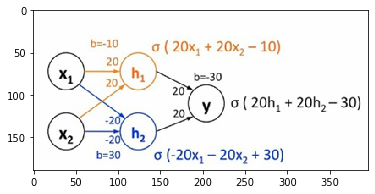

In [32]:
PlotImagen("Diagrama3.jpg")

In [33]:
# 4 observaciones, 2 variables y se incluye el sesgo con un uno al final.
X3 = np.array([
    [1,1,1],
    [1,0,1],
    [0,1,1],
    [0,0,1]
])

In [34]:
PesosCapa1_Diag3 = np.array([
    [20,20,-10],
    [-20,-20,30]])

In [35]:
PesosCapa2_Diag3 = np.array([20,20,-30])

In [36]:
red3 = RedNeuronal(PesosCapa1_Diag3, PesosCapa2_Diag3)
y_aprox3, Hvalues = red3.forward_propagation(X3, True)

Shape de X: (4, 3)
Shape de pesos capa 1 transpuesto: (3, 2)
Shape de A: (4, 3)
[[1.000000e+00 4.539787e-05 1.000000e+00]
 [9.999546e-01 9.999546e-01 1.000000e+00]
 [9.999546e-01 9.999546e-01 1.000000e+00]
 [4.539787e-05 1.000000e+00 1.000000e+00]]
Shape de y hat: (4,)


In [37]:
y_aprox3

array([4.54391049e-05, 9.99954520e-01, 9.99954520e-01, 4.54391049e-05])

In [38]:
Hvalues[:,0]

array([1.000000e+00, 9.999546e-01, 9.999546e-01, 4.539787e-05],
      dtype=float32)

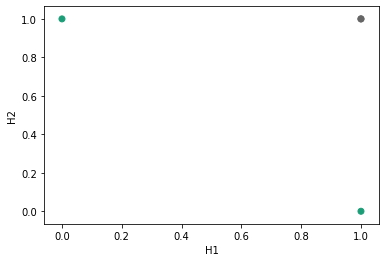

In [39]:
#-- Mostrar representacion en 2d, agrupados por valores obtenidos en "y" aproximado
plt.scatter(Hvalues[:,0],Hvalues[:,1], c=y_aprox3, cmap='Dark2')
plt.xlabel("H1")
plt.ylabel("H2")
plt.show()

### Conclusiones
El resultado intermedio no es mas que una representacion mejor manipulable de los datos, muy parecido a lo visto en reduccion de la dimensionalidad. En este caso particular es lo mismo dada la naturaleza del XOR. Vemos que la red busca encontrar features para poder predecir de mejor forma las salidas.

Como opinión personal se debe tener especial cuidado al manejar las multiplicaciones matriciales. Para la realización de este ejercicio se uso paralelo una representación a mano para llevar un mejor control de lo codificado. 